In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyart.graph.cm as pcm
from netCDF4 import num2date,date2num,Dataset
import scipy,matplotlib
import pyart
import copy
from mpl_toolkits.basemap import Basemap
from math import radians, sin, cos, sqrt, asin
import pyproj
import os, subprocess, time
from joblib import Parallel, delayed
import datetime
from marcus_py_tools import walklevel,latlon_from_xy
%matplotlib inline

In [16]:
kltx_lon = -78.429
kltx_lat = 33.989

In [57]:
flnm = '/home/mvanlier/mvanlier/nexrad_kltx/20161008/grid00_kltx_20161008_193754.nc'
nc = Dataset(flnm,'r')
zhh = nc.variables['reflectivity'][0,:,:,:]
zdr = nc.variables['differential_reflectivity'][0,:,:,:]
kdp = nc.variables['kdp'][0,:,:,:]
xd  = nc.variables['x_disp'][:]
yd  = nc.variables['y_disp'][:]
zd  = nc.variables['z_disp'][:]
nc.close()

lat,lon = latlon_from_xy(xd,yd,kltx_lat,kltx_lon)

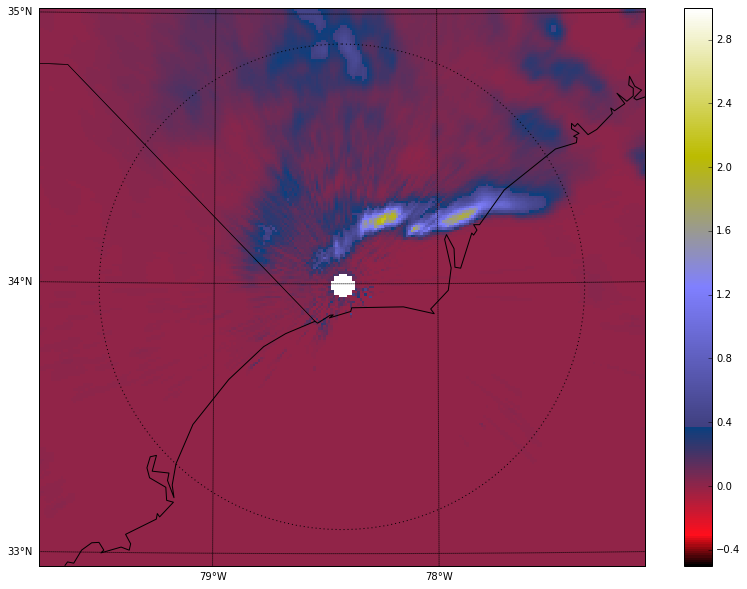

In [50]:
fig = plt.figure(figsize=(14,10))
#kdp_proc = np.ma.masked_where(np.logical_or(rho<0.1,zhh<23.),kdp)
m = Basemap(width=250000.,height=230000,projection='lcc',resolution='i',
            lon_0=kltx_lon,lat_0=kltx_lat,lat_1=33.989,lat_2=39.)
parallels = np.arange(30.,40.,1.)
meridians = np.arange(275.,285.,1.)
m.drawstates(color='k')
m.drawparallels(parallels,color='k',labels=[True,False,False,False])
m.drawmeridians(meridians,color='k',labels=[False,False,False,True])
m.drawcoastlines(color='k')
m.tissot(kltx_lon,kltx_lat,54./60.,100,edgecolor='k',facecolor='none',ls='dotted')
m.tissot(kltx_lon,kltx_lat,108./60.,100,edgecolor='k',facecolor='none',ls='dotted')
#..

#im1 = m.pcolormesh(lon,lat,zhh[4,:,:],vmin=-15.,vmax=75., cmap=cm.gist_ncar,latlon=True)
im1 = m.pcolormesh(lon,lat,kdp[4,:,:],vmin=-0.5,vmax=3., cmap=cm.gist_stern,latlon=True)
plt.colorbar()

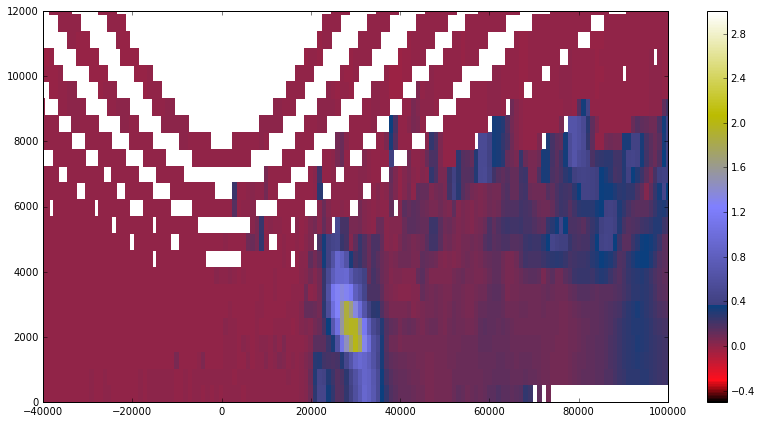

In [55]:
fig=plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
#plt.pcolormesh(xd,zd,zhh[:,:,220],vmin=-15.,vmax=75., cmap=cm.gist_ncar)
plt.pcolormesh(xd,zd,kdp[:,:,220],vmin=-0.5,vmax=3., cmap=cm.gist_stern )
ax.set_xlim(-40000,100000)
ax.set_ylim(0.,12000)
plt.colorbar()


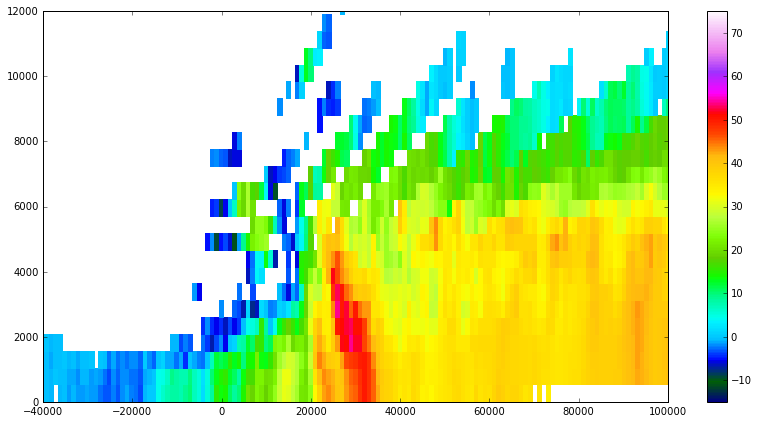

In [56]:
fig=plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xd,zd,zhh[:,:,220],vmin=-15.,vmax=75., cmap=cm.gist_ncar)
#plt.pcolormesh(xd,zd,kdp[:,:,220],vmin=-0.5,vmax=3., cmap=cm.gist_stern )
ax.set_xlim(-40000,100000)
ax.set_ylim(0.,12000)
plt.colorbar()

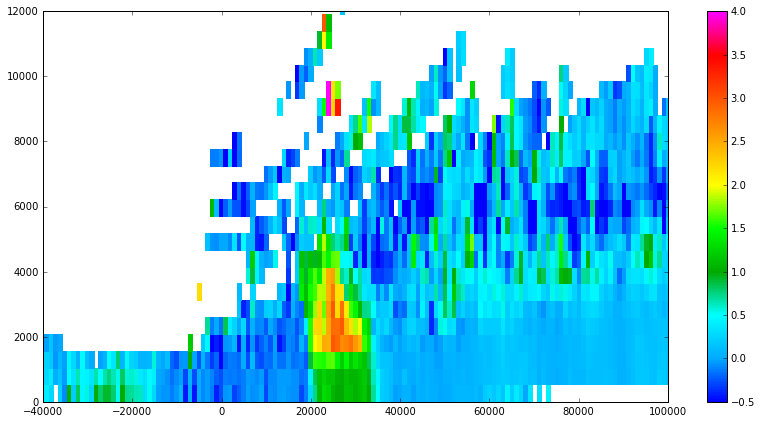

In [60]:
fig=plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
#plt.pcolormesh(xd,zd,zhh[:,:,220],vmin=-15.,vmax=75., cmap=cm.gist_ncar)
plt.pcolormesh(xd,zd,zdr[:,:,220],vmin=-0.5,vmax=4., cmap=pcm.RefDiff )
ax.set_xlim(-40000,100000)
ax.set_ylim(0.,12000)
plt.colorbar()